#Installing and Importing Libraries

In [17]:
!pip install prophet

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.arima.model import ARIMA
from prophet import Prophet
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.cm as cm

# Exploriation

In [4]:
#load the data
df= pd.read_csv('/content/Medical Device Companies.csv')
df

,Material,Category,image,Q1 2005,Q2 2005,Q3 2005,Q4 2005,Q1 2006,Q2 2006,Q3 2006,...,Q2 2017,Q3 2017,Q4 2017,Q1 2018,Q2 2018,Q3 2018,Q4 2018,Q1 2019,Q2 2019,Q3 2019
0,Abbott Lab,US,https://logo.clearbit.com/abbott.com,"$5,383","$5,524","$5,384","$6,047","$4,580","$5,501","$5,574",...,"$6,637","$6,829","$7,589","$7,390","$7,767","$7,656","$7,765","$7,535","$7,979","$8,076"
1,Medtronic,Ireland,https://logo.clearbit.com/medtronic.com,"$2,531","$2,778","$2,690","$2,765","$2,770","$3,067","$2,897",...,"$7,916","$7,390","$7,050","$7,369","$8,144","$7,384","$7,481","$7,546","$8,146","$7,493"
2,Stryker,US,https://logo.clearbit.com/stryker.com,"$1,203","$1,219","$1,172","$1,016","$1,321","$1,262","$1,231",...,"$3,012","$3,006","$3,471","$3,241","$3,322","$3,242","$3,796","$3,516","$3,650","$3,587"
3,Boston Scientific,US,https://logo.clearbit.com/bostonscientific.com,"$1,615","$1,617","$1,511","$1,540","$1,620","$2,110","$2,026",...,"$2,257","$2,222","$2,409","$2,379","$2,490","$2,393","$2,561","$2,493","$2,631","$2,707"
4,Baxter,US,https://logo.clearbit.com/baxter.com,"$2,383","$2,577","$2,398","$2,491","$2,409","$2,649","$2,557",...,"$2,605","$2,707","$2,774","$2,677","$2,842","$2,767","$2,841","$2,632","$2,840","$2,851"
5,Zimmer Biomet,US,https://logo.clearbit.com/zimmerbiomet.com,$829,$847,$763,$848,$860,$882,$820,...,"$1,950","$1,813","$2,068","$2,018","$2,008","$1,837","$2,071","$1,976","$1,989","$1,892"
6,ResMed,US,https://logo.clearbit.com/resmed.com,$108,$125,$127,$146,$162,$171,$164,...,$557,$524,$601,$592,$624,$588,$651,$662,$705,$681
7,Smith & Nephew,UK,https://logo.clearbit.com/smith-nephew.com,$625,$652,$609,$673,$643,$686,$679,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Insulet,US,https://media.licdn.com/dms/image/C510BAQE7d29...,NaN,NaN,NaN,NaN,$0,$1,$1,...,$110,$122,$131,$124,$124,$151,$165,$160,$177,$192
9,Bio-Rad Lab,US,https://logo.clearbit.com/bio-rad.com,$299,$291,$283,$307,$308,$318,$305,...,$505,$534,$621,$552,$576,$545,$617,$554,$573,$561


In [5]:
# data type of each column
df.dtypes

Material    object
Category    object
image       object
Q1 2005     object
Q2 2005     object
             ...  
Q3 2018     object
Q4 2018     object
Q1 2019     object
Q2 2019     object
Q3 2019     object
Length: 62, dtype: object

# Preprocessing & Visualization

In [6]:
# Remove columns that are not needed for the analysis
df = df.drop(columns=['Category', 'image'])
df

,Material,Q1 2005,Q2 2005,Q3 2005,Q4 2005,Q1 2006,Q2 2006,Q3 2006,Q4 2006,Q1 2007,...,Q2 2017,Q3 2017,Q4 2017,Q1 2018,Q2 2018,Q3 2018,Q4 2018,Q1 2019,Q2 2019,Q3 2019
0,Abbott Lab,"$5,383","$5,524","$5,384","$6,047","$4,580","$5,501","$5,574","$6,821","$5,946",...,"$6,637","$6,829","$7,589","$7,390","$7,767","$7,656","$7,765","$7,535","$7,979","$8,076"
1,Medtronic,"$2,531","$2,778","$2,690","$2,765","$2,770","$3,067","$2,897","$3,075","$3,048",...,"$7,916","$7,390","$7,050","$7,369","$8,144","$7,384","$7,481","$7,546","$8,146","$7,493"
2,Stryker,"$1,203","$1,219","$1,172","$1,016","$1,321","$1,262","$1,231","$1,333","$1,426",...,"$3,012","$3,006","$3,471","$3,241","$3,322","$3,242","$3,796","$3,516","$3,650","$3,587"
3,Boston Scientific,"$1,615","$1,617","$1,511","$1,540","$1,620","$2,110","$2,026","$2,065","$2,086",...,"$2,257","$2,222","$2,409","$2,379","$2,490","$2,393","$2,561","$2,493","$2,631","$2,707"
4,Baxter,"$2,383","$2,577","$2,398","$2,491","$2,409","$2,649","$2,557","$2,763","$2,675",...,"$2,605","$2,707","$2,774","$2,677","$2,842","$2,767","$2,841","$2,632","$2,840","$2,851"
5,Zimmer Biomet,$829,$847,$763,$848,$860,$882,$820,$934,$950,...,"$1,950","$1,813","$2,068","$2,018","$2,008","$1,837","$2,071","$1,976","$1,989","$1,892"
6,ResMed,$108,$125,$127,$146,$162,$171,$164,$178,$183,...,$557,$524,$601,$592,$624,$588,$651,$662,$705,$681
7,Smith & Nephew,$625,$652,$609,$673,$643,$686,$679,$771,$744,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Insulet,NaN,NaN,NaN,NaN,$0,$1,$1,$2,$2,...,$110,$122,$131,$124,$124,$151,$165,$160,$177,$192
9,Bio-Rad Lab,$299,$291,$283,$307,$308,$318,$305,$343,$323,...,$505,$534,$621,$552,$576,$545,$617,$554,$573,$561


In [7]:
# Convert the revenue data from string to numeric, remove '$' and ',' characters
df = df.replace('[\$,]', '', regex=True).apply(pd.to_numeric, errors='ignore')
df

,Material,Q1 2005,Q2 2005,Q3 2005,Q4 2005,Q1 2006,Q2 2006,Q3 2006,Q4 2006,Q1 2007,...,Q2 2017,Q3 2017,Q4 2017,Q1 2018,Q2 2018,Q3 2018,Q4 2018,Q1 2019,Q2 2019,Q3 2019
0,Abbott Lab,5383.0,5524.0,5384.0,6047.0,4580.0,5501.0,5574,6821,5946,...,6637.0,6829.0,7589.0,7390.0,7767.0,7656.0,7765.0,7535.0,7979.0,8076.0
1,Medtronic,2531.0,2778.0,2690.0,2765.0,2770.0,3067.0,2897,3075,3048,...,7916.0,7390.0,7050.0,7369.0,8144.0,7384.0,7481.0,7546.0,8146.0,7493.0
2,Stryker,1203.0,1219.0,1172.0,1016.0,1321.0,1262.0,1231,1333,1426,...,3012.0,3006.0,3471.0,3241.0,3322.0,3242.0,3796.0,3516.0,3650.0,3587.0
3,Boston Scientific,1615.0,1617.0,1511.0,1540.0,1620.0,2110.0,2026,2065,2086,...,2257.0,2222.0,2409.0,2379.0,2490.0,2393.0,2561.0,2493.0,2631.0,2707.0
4,Baxter,2383.0,2577.0,2398.0,2491.0,2409.0,2649.0,2557,2763,2675,...,2605.0,2707.0,2774.0,2677.0,2842.0,2767.0,2841.0,2632.0,2840.0,2851.0
5,Zimmer Biomet,829.0,847.0,763.0,848.0,860.0,882.0,820,934,950,...,1950.0,1813.0,2068.0,2018.0,2008.0,1837.0,2071.0,1976.0,1989.0,1892.0
6,ResMed,108.0,125.0,127.0,146.0,162.0,171.0,164,178,183,...,557.0,524.0,601.0,592.0,624.0,588.0,651.0,662.0,705.0,681.0
7,Smith & Nephew,625.0,652.0,609.0,673.0,643.0,686.0,679,771,744,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Insulet,NaN,NaN,NaN,NaN,0.0,1.0,1,2,2,...,110.0,122.0,131.0,124.0,124.0,151.0,165.0,160.0,177.0,192.0
9,Bio-Rad Lab,299.0,291.0,283.0,307.0,308.0,318.0,305,343,323,...,505.0,534.0,621.0,552.0,576.0,545.0,617.0,554.0,573.0,561.0


In [8]:
#renaming the material column to be more understandable
df.rename(columns={'Material': 'Company'}, inplace=True)
df

,Company,Q1 2005,Q2 2005,Q3 2005,Q4 2005,Q1 2006,Q2 2006,Q3 2006,Q4 2006,Q1 2007,...,Q2 2017,Q3 2017,Q4 2017,Q1 2018,Q2 2018,Q3 2018,Q4 2018,Q1 2019,Q2 2019,Q3 2019
0,Abbott Lab,5383.0,5524.0,5384.0,6047.0,4580.0,5501.0,5574,6821,5946,...,6637.0,6829.0,7589.0,7390.0,7767.0,7656.0,7765.0,7535.0,7979.0,8076.0
1,Medtronic,2531.0,2778.0,2690.0,2765.0,2770.0,3067.0,2897,3075,3048,...,7916.0,7390.0,7050.0,7369.0,8144.0,7384.0,7481.0,7546.0,8146.0,7493.0
2,Stryker,1203.0,1219.0,1172.0,1016.0,1321.0,1262.0,1231,1333,1426,...,3012.0,3006.0,3471.0,3241.0,3322.0,3242.0,3796.0,3516.0,3650.0,3587.0
3,Boston Scientific,1615.0,1617.0,1511.0,1540.0,1620.0,2110.0,2026,2065,2086,...,2257.0,2222.0,2409.0,2379.0,2490.0,2393.0,2561.0,2493.0,2631.0,2707.0
4,Baxter,2383.0,2577.0,2398.0,2491.0,2409.0,2649.0,2557,2763,2675,...,2605.0,2707.0,2774.0,2677.0,2842.0,2767.0,2841.0,2632.0,2840.0,2851.0
5,Zimmer Biomet,829.0,847.0,763.0,848.0,860.0,882.0,820,934,950,...,1950.0,1813.0,2068.0,2018.0,2008.0,1837.0,2071.0,1976.0,1989.0,1892.0
6,ResMed,108.0,125.0,127.0,146.0,162.0,171.0,164,178,183,...,557.0,524.0,601.0,592.0,624.0,588.0,651.0,662.0,705.0,681.0
7,Smith & Nephew,625.0,652.0,609.0,673.0,643.0,686.0,679,771,744,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Insulet,NaN,NaN,NaN,NaN,0.0,1.0,1,2,2,...,110.0,122.0,131.0,124.0,124.0,151.0,165.0,160.0,177.0,192.0
9,Bio-Rad Lab,299.0,291.0,283.0,307.0,308.0,318.0,305,343,323,...,505.0,534.0,621.0,552.0,576.0,545.0,617.0,554.0,573.0,561.0


In [10]:
# Reshape the data into a long format suitable for time series analysis
df_long = pd.melt(df, id_vars=['Company'], var_name='Quarter', value_name='Revenue(in million $)')
df_long

,Company,Quarter,Revenue(in million $)
0,Abbott Lab,Q1 2005,5383.0
1,Medtronic,Q1 2005,2531.0
2,Stryker,Q1 2005,1203.0
3,Boston Scientific,Q1 2005,1615.0
4,Baxter,Q1 2005,2383.0
...,...,...,...
1234,DexCom,Q3 2019,396.0
1235,Teleflex,Q3 2019,648.0
1236,STERIS,Q3 2019,737.0
1237,Varian Medical,Q3 2019,879.0


In [11]:
# Extract year and quarter information
df_long['Year'] = df_long['Quarter'].apply(lambda x: int(x.split(' ')[1]))
df_long['Quarter'] = df_long['Quarter'].apply(lambda x: x.split(' ')[0])
df_long

,Company,Quarter,Revenue(in million $),Year
0,Abbott Lab,Q1,5383.0,2005
1,Medtronic,Q1,2531.0,2005
2,Stryker,Q1,1203.0,2005
3,Boston Scientific,Q1,1615.0,2005
4,Baxter,Q1,2383.0,2005
...,...,...,...,...
1234,DexCom,Q3,396.0,2019
1235,Teleflex,Q3,648.0,2019
1236,STERIS,Q3,737.0,2019
1237,Varian Medical,Q3,879.0,2019


In [12]:
# Sort the data by company and time
df_long = df_long.sort_values(by=['Company', 'Year', 'Quarter'])
df_long

,Company,Quarter,Revenue(in million $),Year
0,Abbott Lab,Q1,5383.0,2005
21,Abbott Lab,Q2,5524.0,2005
42,Abbott Lab,Q3,5384.0,2005
63,Abbott Lab,Q4,6047.0,2005
84,Abbott Lab,Q1,4580.0,2006
...,...,...,...,...
1139,Zimmer Biomet,Q3,1837.0,2018
1160,Zimmer Biomet,Q4,2071.0,2018
1181,Zimmer Biomet,Q1,1976.0,2019
1202,Zimmer Biomet,Q2,1989.0,2019


In [13]:
# Create a new 'Date' column with datetime objects
quarter_to_month = {
    'Q1': 3,
    'Q2': 6,
    'Q3': 9,
    'Q4': 12
}

df_long['Date'] = df_long.apply(lambda row: f"{row['Year']}-{quarter_to_month[row['Quarter']]:02d}", axis=1)

df_long.head(30)

,Company,Quarter,Revenue(in million $),Year,Date
0,Abbott Lab,Q1,5383.0,2005,2005-03
21,Abbott Lab,Q2,5524.0,2005,2005-06
42,Abbott Lab,Q3,5384.0,2005,2005-09
63,Abbott Lab,Q4,6047.0,2005,2005-12
84,Abbott Lab,Q1,4580.0,2006,2006-03
105,Abbott Lab,Q2,5501.0,2006,2006-06
126,Abbott Lab,Q3,5574.0,2006,2006-09
147,Abbott Lab,Q4,6821.0,2006,2006-12
168,Abbott Lab,Q1,5946.0,2007,2007-03
189,Abbott Lab,Q2,6371.0,2007,2007-06


In [14]:
df_long.dtypes

Company                   object
Quarter                   object
Revenue(in million $)    float64
Year                       int64
Date                      object
dtype: object

In [15]:
#find the NaN
df_long.isna().sum()

Company                   0
Quarter                   0
Revenue(in million $)    36
Year                      0
Date                      0
dtype: int64

In [16]:
# Handle missing values by forward filling and backward filling
df_long = df_long.sort_values(by=['Company', 'Date'])
df_long['Revenue(in million $)'] = df_long.groupby('Company')['Revenue(in million $)'].ffill().bfill()

df_long

,Company,Quarter,Revenue(in million $),Year,Date
0,Abbott Lab,Q1,5383.0,2005,2005-03
21,Abbott Lab,Q2,5524.0,2005,2005-06
42,Abbott Lab,Q3,5384.0,2005,2005-09
63,Abbott Lab,Q4,6047.0,2005,2005-12
84,Abbott Lab,Q1,4580.0,2006,2006-03
...,...,...,...,...,...
1139,Zimmer Biomet,Q3,1837.0,2018,2018-09
1160,Zimmer Biomet,Q4,2071.0,2018,2018-12
1181,Zimmer Biomet,Q1,1976.0,2019,2019-03
1202,Zimmer Biomet,Q2,1989.0,2019,2019-06


###Visualization

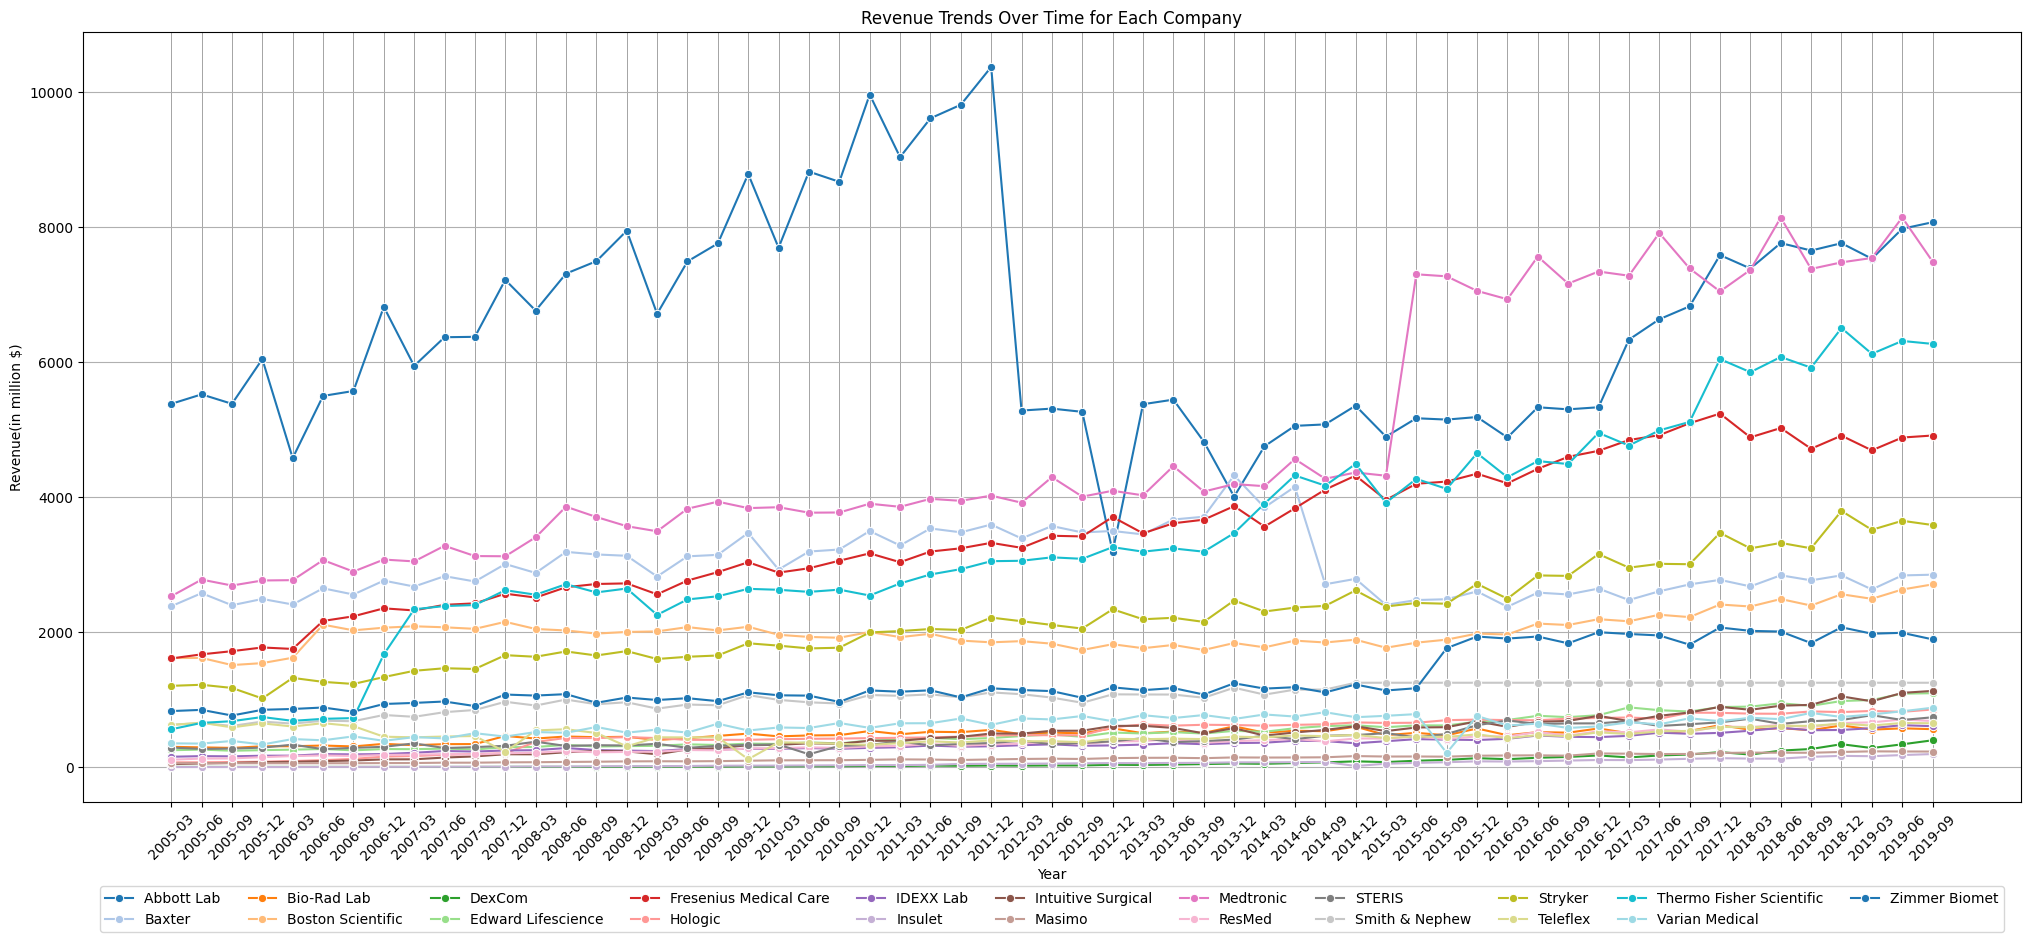

In [126]:
plt.figure(figsize=(25 ,10))
plt.gca().xaxis.grid(True, which='major', linestyle='-', linewidth='0.5', color='gray')
plt.gca().xaxis.grid(True, which='minor', linestyle='--', linewidth='0.5', color='lightgray')

sns.lineplot(data=df_long, x='Date', y='Revenue(in million $)', hue='Company',marker='o', palette='tab20')
plt.title('Revenue Trends Over Time for Each Company')
plt.xlabel('Year')
plt.xticks(rotation=45)
plt.ylabel('Revenue(in million $)')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.10), ncol=11)
plt.grid(True)
plt.show()

# Model Training and Testing

### Splitting the data into training dataset and testing dataset

In [172]:
train_indices = []
test_indices = []
rmse_results1 = []
companies= df['Company'].unique()
for company in companies:
    company_data = df_long[df_long['Company'] == company].set_index('Date')['Revenue(in million $)']
    n = len(company_data)
    train_idx, test_idx = train_test_split(range(n), train_size=0.8, shuffle=False)
    train_indices.extend([(company, df_long[df_long['Company']==company]['Date'].iloc[idx]) for idx in train_idx])
    test_indices.extend([(company, df_long[df_long['Company']==company]['Date'].iloc[idx]) for idx in test_idx])

train_data = df_long.set_index(['Company', 'Date']).loc[train_indices].reset_index()
test_data = df_long.set_index(['Company', 'Date']).loc[test_indices].reset_index()

### we will use exponential smoothing , ARIMA and Prophet models

In [23]:
# Exponential Smoothing
def forecast_revenue_exp_smoothing(data, company, periods=8):
    company_data = data[data['Company'] == company].set_index('Date')['Revenue(in million $)']
    model = ExponentialSmoothing(company_data, trend='add', seasonal='add', seasonal_periods=4).fit()
    forecast = model.forecast(periods)
    forecast.index = pd.date_range(start=company_data.index[-1], periods=periods+1, freq='Q')[1:]
    return forecast

In [24]:
#ARIMA
def forecast_revenue_arima(data, company, periods=8):
    company_data = data[data['Company'] == company].set_index('Date')['Revenue(in million $)']
    model = ARIMA(company_data, order=(5, 1, 0)).fit()
    forecast = model.forecast(steps=periods)
    forecast.index = pd.date_range(start=company_data.index[-1], periods=periods+1, freq='Q')[1:]
    return forecast

In [25]:
#prophet
def prepare_prophet_data(data, company):
    company_data = data[data['Company'] == company][['Date', 'Revenue(in million $)']].rename(columns={'Date': 'ds', 'Revenue(in million $)': 'y'})
    return company_data

def forecast_revenue_prophet(data, company, periods=8):
    company_data = prepare_prophet_data(data, company)
    model = Prophet(yearly_seasonality=True, weekly_seasonality=False, daily_seasonality=False)
    model.add_seasonality(name='quarterly', period=91.25, fourier_order=8)
    model.fit(company_data)
    future = model.make_future_dataframe(periods=periods, freq='Q')
    forecast = model.predict(future)
    forecast.set_index('ds', inplace=True)
    return forecast['yhat'][-periods:]


In [26]:
def evaluate_model(true_values, predictions):
    rmse = np.sqrt(mean_squared_error(true_values, predictions))
    return rmse

In [173]:
# Fitting the models and evaluating them
for company in companies:
    train_true_values = train_data[train_data['Company'] == company]['Revenue(in million $)']
    test_true_values = test_data[test_data['Company'] == company]['Revenue(in million $)']

    # Exponential Smoothing
    forecast_exp_train = forecast_revenue_exp_smoothing(train_data, company, periods=len(train_true_values))
    forecast_exp_test = forecast_revenue_exp_smoothing(pd.concat([train_data, test_data]), company, periods=len(test_true_values))
    rmse_exp_train = evaluate_model(train_true_values, forecast_exp_train)
    rmse_exp_test = evaluate_model(test_true_values, forecast_exp_test)

    # ARIMA
    forecast_arima_train = forecast_revenue_arima(train_data, company, periods=len(train_true_values))
    forecast_arima_test = forecast_revenue_arima(pd.concat([train_data, test_data]), company, periods=len(test_true_values))
    rmse_arima_train = evaluate_model(train_true_values, forecast_arima_train)
    rmse_arima_test = evaluate_model(test_true_values, forecast_arima_test)

    # Prophet
    forecast_prophet_train = forecast_revenue_prophet(train_data, company, periods=len(train_true_values))
    forecast_prophet_test = forecast_revenue_prophet(pd.concat([train_data, test_data]), company, periods=len(test_true_values))
    rmse_prophet_train = evaluate_model(train_true_values, forecast_prophet_train)
    rmse_prophet_test = evaluate_model(test_true_values, forecast_prophet_test)

    rmse_results1.append({
        'Company': company,
        'RMSE_ExponentialSmoothing_Train': rmse_exp_train,
        'RMSE_ExponentialSmoothing_Test': rmse_exp_test,
        'RMSE_ARIMA_Train': rmse_arima_train,
        'RMSE_ARIMA_Test': rmse_arima_test,
        'RMSE_Prophet_Train': rmse_prophet_train,
        'RMSE_Prophet_Test': rmse_prophet_test
    })

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be use

### Comparison using RMSE results





In [175]:
rmse_df1 = pd.DataFrame(rmse_results1)
rmse_df1

,Company,RMSE_ExponentialSmoothing_Train,RMSE_ExponentialSmoothing_Test,RMSE_ARIMA_Train,RMSE_ARIMA_Test,RMSE_Prophet_Train,RMSE_Prophet_Test
0,Abbott Lab,2534.240373,1351.959090,2015.051568,1136.384528,32573.781009,16446.576276
1,Medtronic,5837.937051,708.961156,3253.344209,285.983759,30426.816842,41716.941996
2,Stryker,1904.437379,695.596250,1536.947073,723.639652,17472.285374,32808.066389
3,Boston Scientific,798.326797,664.279250,206.630155,376.620748,7783.150030,7489.034416
4,Baxter,949.017541,213.121060,657.820743,220.944358,17159.798606,19240.218724
5,Zimmer Biomet,1429.957911,147.352043,542.668460,64.320413,9367.105500,13462.586582
6,ResMed,400.634442,223.190519,374.595715,231.093657,3019.636203,7532.874976
7,Smith & Nephew,639.122988,104.983284,324.354186,0.000000,11501.739915,8376.125324
8,Insulet,104.792134,91.526855,65.197929,77.034107,324.363933,411.928558
9,Bio-Rad Lab,202.901096,58.890964,126.200271,35.589544,2017.948047,1219.546251


### Model Selection

---



Average RMSE for each model: 

RMSE_ExponentialSmoothing_Train     1220.726687
RMSE_ExponentialSmoothing_Test       379.337646
RMSE_ARIMA_Train                     766.159655
RMSE_ARIMA_Test                      290.980637
RMSE_Prophet_Train                 10547.969493
RMSE_Prophet_Test                  10593.345119
dtype: float64

Best model based on training RMSE: ARIMA
Best model based on testing RMSE: ARIMA




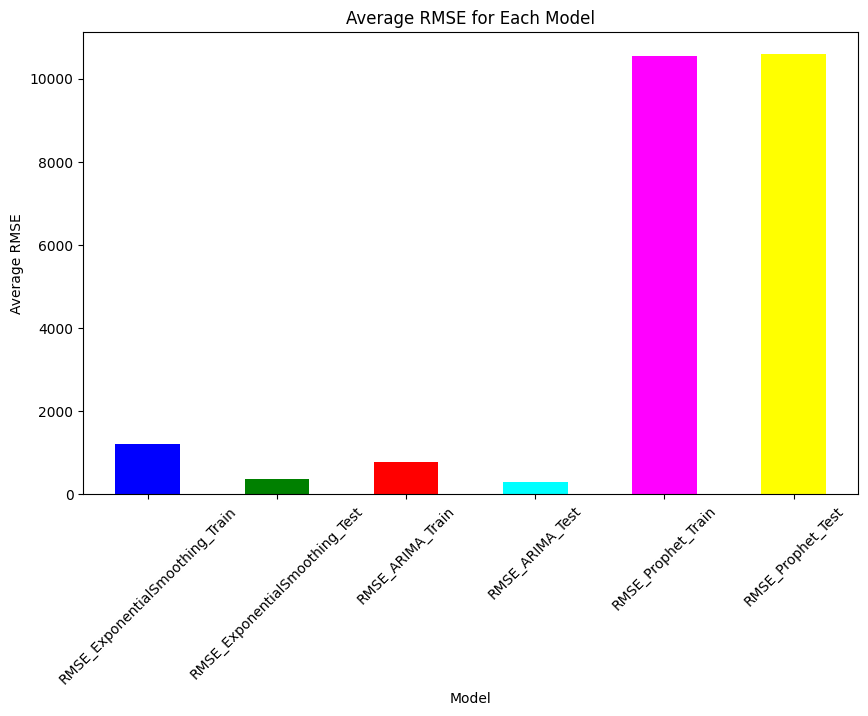

In [179]:
# Calculate the average RMSE for each model across all companies
average_rmse = rmse_df1.drop('Company', axis=1).mean()

# Display the average RMSE for each model
print("Average RMSE for each model: \n")
print(average_rmse)

# Determine the best model based on the lowest average RMSE
best_model = average_rmse.idxmin()
best_model_rmse = average_rmse.min()

# Identify the best model based on the lowest average RMSE for training and testing sets
best_model_train = average_rmse[['RMSE_ExponentialSmoothing_Train', 'RMSE_ARIMA_Train', 'RMSE_Prophet_Train']].idxmin()
best_model_test = average_rmse[['RMSE_ExponentialSmoothing_Test', 'RMSE_ARIMA_Test', 'RMSE_Prophet_Test']].idxmin()

best_model_train = best_model_train.replace('RMSE_', '').replace('_Train', '')
best_model_test = best_model_test.replace('RMSE_', '').replace('_Test', '')

print("\nBest model based on training RMSE:", best_model_train)
print("Best model based on testing RMSE:", best_model_test)
print("\n")

# Visualize the average RMSE for each model
average_rmse.plot(kind='bar', figsize=(10, 6), color=['blue', 'green', 'red', 'cyan', 'magenta', 'yellow'])
plt.title('Average RMSE for Each Model')
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.ylabel('Average RMSE')
plt.show()


# Forecasting

### Predictions using ARIMA Model

In [138]:
# Create a new dataframe to store the predictions
predictions_arima = pd.DataFrame(columns=['Company', 'Date', 'Predicted_Revenue'])

# Loop through each company and get the ARIMA forecast
for company in df['Company'].unique():
    forecast_arima = forecast_revenue_arima(df_long, company)
    forecast_df = pd.DataFrame({
        'Company': company,
        'Date': forecast_arima.index,
        'Predicted_Revenue': forecast_arima.values
    })
    predictions_arima = pd.concat([predictions_arima, forecast_df], ignore_index=True)

predictions_arima.head(20)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be use

,Company,Date,Predicted_Revenue
0,Abbott Lab,2019-12-31,8066.642397
1,Abbott Lab,2020-03-31,8074.951616
2,Abbott Lab,2020-06-30,8124.422600
3,Abbott Lab,2020-09-30,8055.018757
4,Abbott Lab,2020-12-31,8059.896538
5,Abbott Lab,2021-03-31,8061.767612
6,Abbott Lab,2021-06-30,8057.793328
7,Abbott Lab,2021-09-30,8050.076657
8,Medtronic,2019-12-31,7600.308462
9,Medtronic,2020-03-31,7575.270368


### Forecasting Visualization

<ipython-input-133-4e3851f04553>:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = cm.get_cmap('tab20', len(df['Company'].unique()))
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_

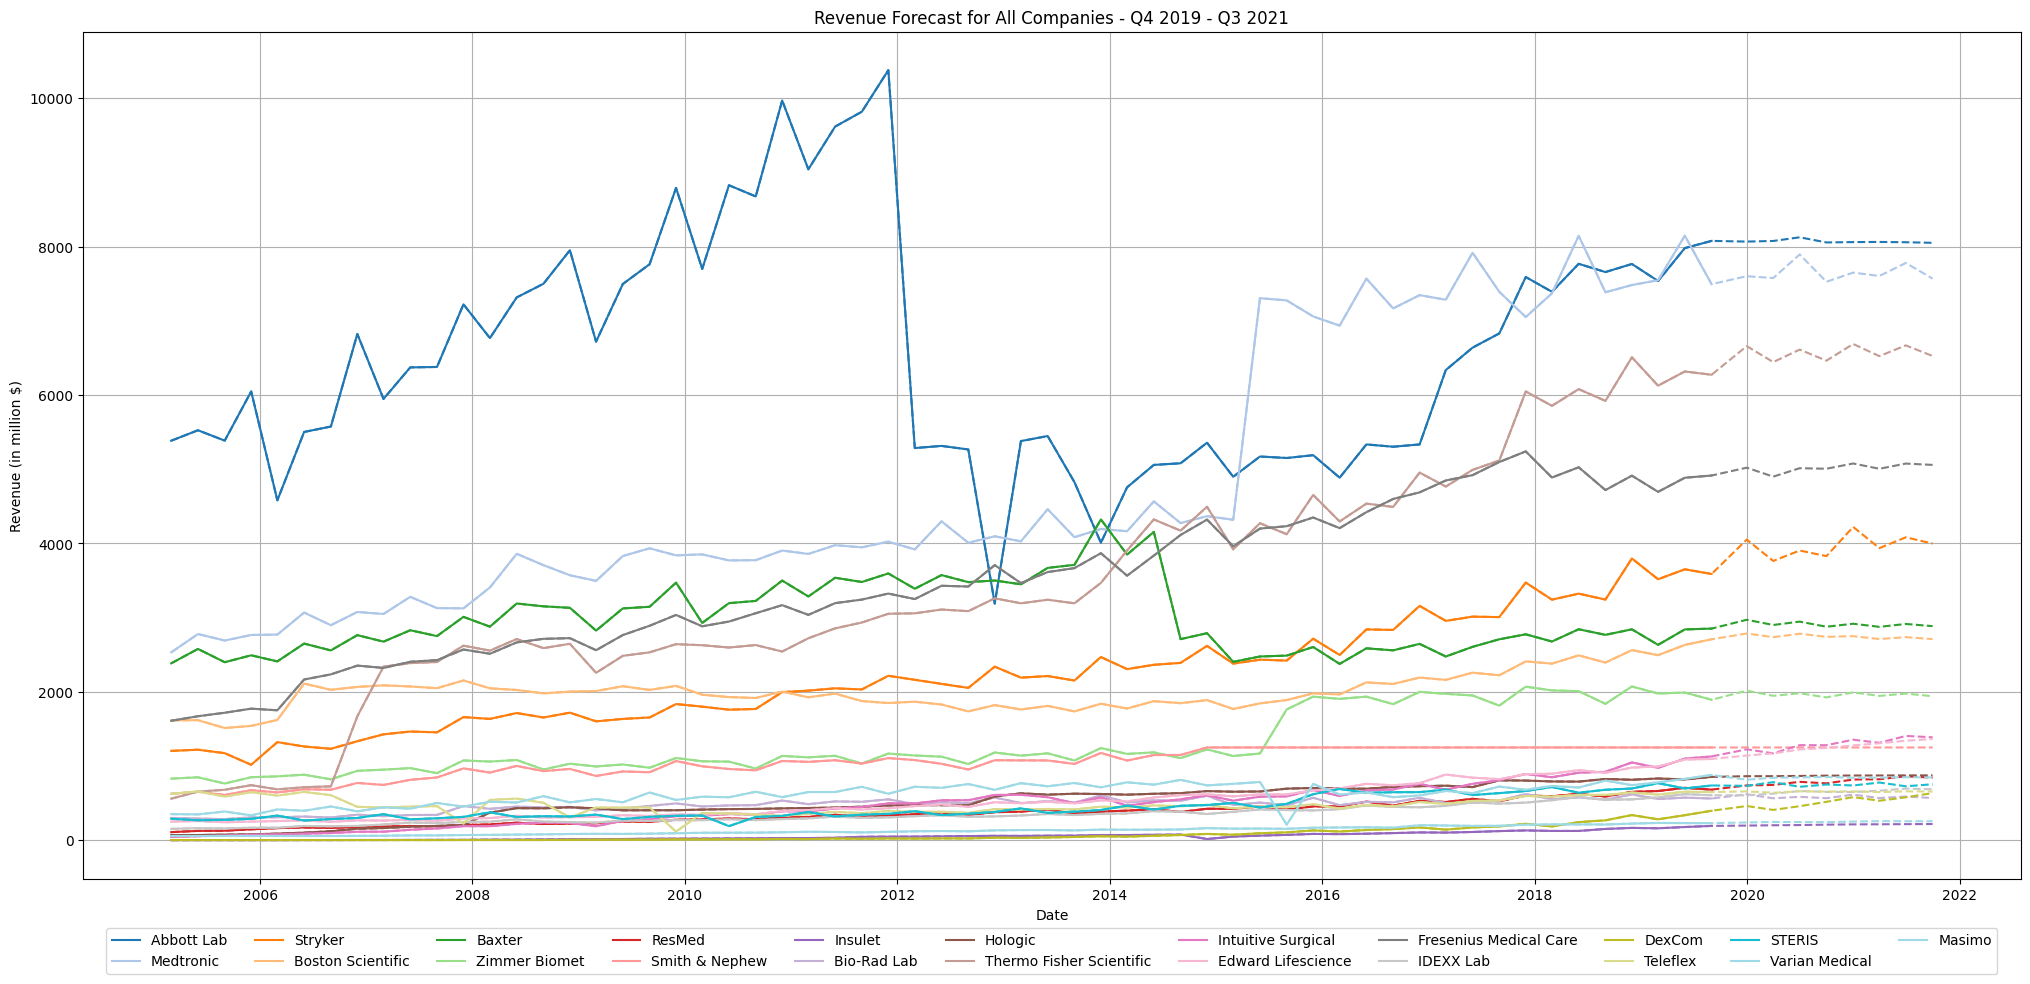

In [133]:
# Initialize a plot
plt.figure(figsize=(25, 11))

# Get a color map with as many colors as there are unique companies
colors = cm.get_cmap('tab20', len(df['Company'].unique()))

# Loop through each company and plot actual and forecasted revenue
for i, company in enumerate(df['Company'].unique()):
    # Extract actual revenue data
    true_values = df_long[df_long['Company'] == company].set_index('Date')['Revenue(in million $)']
    true_values.index = pd.to_datetime(true_values.index)

    # Generate forecast
    forecast_arima = forecast_revenue_arima(df_long, company)
    forecast_arima.index = pd.to_datetime(forecast_arima.index)

    # Combine actual and forecasted values into a single Series
    combined = pd.concat([true_values, forecast_arima])

    # Plot actual values with a solid line in the same color
    plt.plot(true_values.index, true_values.values, label=f'{company}', color=colors(i))

    # Plot forecasted values with a dotted line in the same color
    plt.plot(combined.index, combined.values, linestyle='--', color=colors(i))

# Set plot title and labels
plt.title('Revenue Forecast for All Companies - Q4 2019 - Q3 2021')
plt.xlabel('Date')
plt.ylabel('Revenue (in million $)')
plt.grid(True)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=11)

plt.show()